## Problem Statement
The goal of this notebook is to develop a classification model using traditional ML models that can predict the likelihood of a heart attack based on various patient health indicators. The dataset contains information on patients' demographic details, medical history, and diagnostic measures. The primary objective is to accurately classify patients into two categories: those with a higher likelihood of experiencing a heart attack (target = 1) and those with a lower likelihood (target = 0).


## Dataset
The dataset used throught this project is The heart disease Dataset by UCI. The dataset is accessible at UCI 

Citation: Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt


### Step :01 Load Data

In [3]:
#Loading the heart_disease_uci dataset
data = pd.read_csv('..\data\heart_disease\heart_disease_uci.csv')
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
data.shape

(920, 16)

### Step 02 :Feature Description

#### 1. Age
- The patient's age in years(continuous)
- Age is a critical factor in heart attack risks as  the risk of heart disease increases with age.

In [5]:
data['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

#### 2. Sex
- the gender of the patient, where values are Male and Female (categorical).
- Gender plays a significant role in heart disease risk. Men typically face a higher risk of heart disease earlier in life compared to women. However, after menopause, the risk for women increases and can become similar to that of men.

In [6]:
data['sex'].value_counts()

Male      726
Female    194
Name: sex, dtype: int64

#### 3. cp(Chest pain type)
- The type of chest pain experienced by the patient (categorical):
    1. Typical angina
    2. Atypical Angina
    3. Non-anginal Pain
    4. Asymptomatic

- Typical Angina: Pain usually triggered by exertion or stress and relieved by rest. It often indicates a significant risk of heart disease.
- Atypical Angina: Pain that is not typical of angina, which can also be a sign of heart disease but may be less straightforward.
- Non-Anginal Pain: Pain that doesn’t fit the typical angina profile and might not be related to heart disease.
- Asymptomatic: No pain or symptoms, which can sometimes make heart disease harder to detect.


In [7]:
data['cp'].value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

#### 4. tresbps(Resting Blood Pressure)
- The patient's blood pressure while at rest, measured in millimeters (mm Hg)(continuous).
- Blood pressure is a key indicator of heart health. High resting blood pressure can indicate hypertension, which is a major risk factor for heart disease and stroke.

In [8]:
data['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

#### 5. chol(Cholestrol Level)
- The amount of cholesterol in the blood, measured in milligrams (mg/dl)(continuous).
- High cholesterol levels can lead to the buildup of plaque in the arteries, increasing the risk of heart disease. Cholesterol levels are crucial for assessing cardiovascular risk.

In [10]:
data['chol'].describe()

count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64

#### 6. fbs(Fasting Blood Sugar)
- Whether the fasting blood sugar level is greater than 120 mg/dl(categorical True/False)
- Elevated fasting blood sugar levels can indicate diabetes or prediabetes, which significantly increases the risk of heart disease.

In [11]:
data['fbs'].describe()

count       830
unique        2
top       False
freq        692
Name: fbs, dtype: object

#### 7. restecg (resting electrocardiographic Results)
- Results from an electrocardiogram (ECG) at rest(categorical)
- Normal: No apparent abnormalities in heart function.
- st-t abnormality: May indicate heart disease or other issues.
- lv hypertrophy: Thickening of the heart's left ventricle, often a sign of long-term high blood pressure or other heart conditions

In [12]:
data['restecg'].value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

#### 8. thalch(Maximum Heart rate Achieved)
- The highest heart rate the patient reached during exercise or stress testing (continuous).
- A high maximum heart rate is generally a positive indicator of cardiovascular fitness. A lower maximum heart rate during exercise might indicate heart problems.

In [13]:
data['thalch'].describe()

count    865.000000
mean     137.545665
std       25.926276
min       60.000000
25%      120.000000
50%      140.000000
75%      157.000000
max      202.000000
Name: thalch, dtype: float64

#### 9. exang(Exercise Induced Angina)
- Whether the patient experiences angina (chest pain) during exercise (catagorical)
- Exercise-induced angina suggests that the heart is not getting enough oxygen during physical exertion, which can be a sign of coronary artery disease.

In [14]:
data['exang'].value_counts()

False    528
True     337
Name: exang, dtype: int64

#### 10. oldpeak(ST Depression Induced by Exercise)
- The depression of the ST segment of the ECG during exercise compared to rest (continuous).
- ST segment depression during exercise can be an indicator of ischemia, where the heart muscle isn’t receiving enough oxygen-rich blood.

In [15]:
data['oldpeak'].describe()

count    858.000000
mean       0.878788
std        1.091226
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

#### 11. slope (11. Slope of the Peak Exercise ST Segment)
- The slope of the ST segment at peak exercise (categorical , upsloping/flat/downsloping)
- Upsloping: Typically not associated with heart disease.
- Flat: Can be a sign of heart disease, especially if it occurs during exercise.
- Downsloping: Often associated with significant heart disease.

In [16]:
data['slope'].value_counts()

flat           345
upsloping      203
downsloping     63
Name: slope, dtype: int64

#### 12. ca(major vessels)
- number of major vessels (0-3) colored by flourosopy(continuous)

In [17]:
data['ca'].value_counts()

0.0    181
1.0     67
2.0     41
3.0     20
Name: ca, dtype: int64

#### 13. thal
- A blood disorder called thalassemia(categorical)
- normal blood flow 
- fixed defect (no blood flow in some part of the heart) 
- reversible  (a blood flow is observed but it is not normal(nominal)

In [18]:
data['thal'].value_counts()

normal               196
reversable defect    192
fixed defect          46
Name: thal, dtype: int64

#### 14. num (target)
- Whether the patient has heart disease(categorical , 0/1/2/3/4)
- 0 - no heart attack
- 1-4 : severity of attack
- this is the outcome variable indicating whether the patient is diagnosed with heart disease, which is the primary focus of prediction in this project

In [19]:
data['num'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [20]:
#Converting num to binary as we are trying to predict if a person has heart disease or not
data['num'] = data['num'].apply(lambda x: 1 if x>0 else 0)
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Step 3: Understanding the data


In [21]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Findings
- Number of records : The dataset consists of 918 records, ranging from 0 to 919.

- Columns : there are 15 columns in total including target column.

In [23]:
#numerical columns
num_data=data.select_dtypes(include=['int64','float64'])
num_data.columns

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')

In [24]:
#categorical columns
cat_data= data.select_dtypes(include=['object'])
cat_data.columns

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [25]:
#unique values
for x in cat_data:
  print(x)
  print("unique_values",data[x].unique())
  print("value_count",data[x].value_counts())
  print('--------------------------')

sex
unique_values ['Male' 'Female']
value_count Male      726
Female    194
Name: sex, dtype: int64
--------------------------
dataset
unique_values ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
value_count Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64
--------------------------
cp
unique_values ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
value_count asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64
--------------------------
fbs
unique_values [True False nan]
value_count False    692
True     138
Name: fbs, dtype: int64
--------------------------
restecg
unique_values ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
value_count normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64
--------------------------
exang
unique_values [False True nan]
value_count False    528
True     33

In [26]:
#statistical report for numercial data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.553261,0.497426,0.0,0.00,1.0,1.00,1.0


### Findings
 1. Age
 The average age is approximately 53.5 years, with most patients being middle-aged (47 to 60 years).

 2. Resting Blood Pressure (RestingBP)
 The average resting blood pressure is 132.1 mm Hg, but the dataset contains some potential errors, such as a minimum value of 0.

 3. Cholesterol
 The average cholesterol level is 199.1 mg/dL, with a wide range indicating high variability. The minimum value of 0 suggests possible data entry errors.
 
 4. Maximum Heart Rate Achieved (thalch)
 The average maximum heart rate during exercise is 137.5 bpm, with a broad range from 60 to 202 bpm.
 
 5. Oldpeak
 The average ST depression is 0.878, with most values indicating mild to moderate ischemia during exercise.
 
 6. target (num)
 55.3% of patients in the dataset have been diagnosed with heart disease, indicating a slight imbalance in the dataset towards positive cases.


### Step 4: Data Preprocessing

In [27]:
#check for missing values
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [28]:
# check the percentage of missing values:

data.isnull().mean().sort_values(ascending=False) * 100

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

### Dealing with missing values


In [29]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [30]:
# define the function to impute the missing values in thal column
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

def impute_categorical_missing_data(passed_col):
    
    df_null = data[data[passed_col].isnull()]
    df_not_null = data[data[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = data[data[passed_col].isnull()]
    df_not_null = data[data[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [31]:
print(f"Missing values count of columns before imputation: \n{data.isnull().sum()[data.isnull().sum() > 0].sort_values(ascending=False)}")

Missing values count of columns before imputation: 
ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64


In [32]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# all the columns having missing values:

missing_data_cols = data.columns[data.isnull().any()]

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((data[col].isnull().sum() / len(data)) * 100, 2))+"%")
    if col in categorical_cols:
        data[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        data[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.306531791907513 

RMSE = 17.31286953237639 

R2 = 0.06412917288961273 

Missing Values chol : 3.26%
MAE = 44.22696629213483 

RMSE = 63.3393406425557 

R2 = 0.6821913440150502 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.92 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 63.04 accuracy

Missing Values thalch : 5.98%
MAE = 16.981502890173413 

RMSE = 21.875161806172834 

R2 = 0.3041880842508422 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.77 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5839941860465117 

RMSE = 0.8320103036314137 

R2 = 0.34049915694850086 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 68.29 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 64.52 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 73.56 accuracy



In [33]:
data.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

#### Identifying Outliers
- Outliers are extreme values that can mislead data analysis and lead to inaccurate predictions.

- They are identified using visual tools like box plots, which highlight deviations in numerical data.

- Addressing outliers is crucial to ensure reliable and accurate model outcomes.


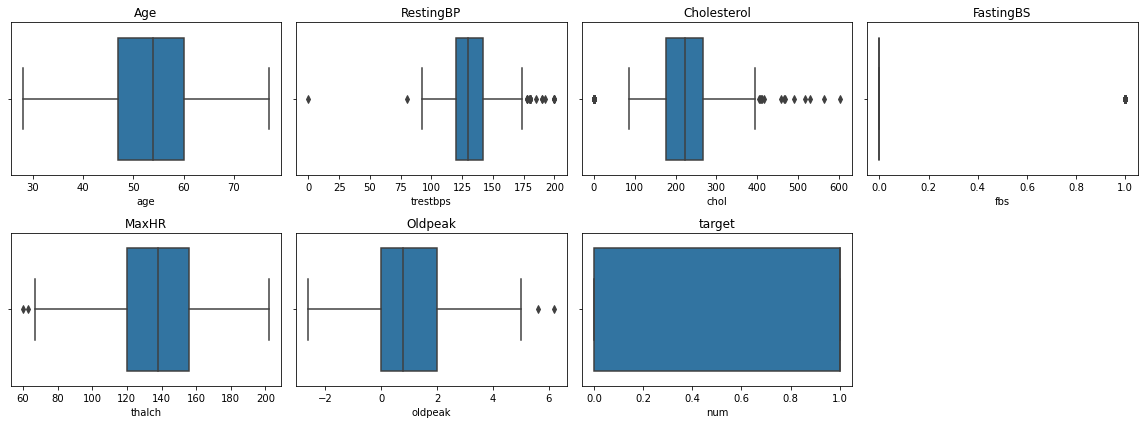

In [34]:
#setup the seaborn figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 6))

# Plotting box plots for each feature
sns.boxplot(data=data, x='age', ax=axes[0, 0])
axes[0, 0].set_title("Age")
sns.boxplot(data=data, x='trestbps', ax=axes[0, 1])
axes[0, 1].set_title("RestingBP")
sns.boxplot(data=data, x='chol', ax=axes[0, 2])
axes[0, 2].set_title("Cholesterol")
sns.boxplot(data=data, x='fbs', ax=axes[0, 3])
axes[0, 3].set_title("FastingBS")
sns.boxplot(data=data, x='thalch', ax=axes[1, 0])
axes[1, 0].set_title("MaxHR")
sns.boxplot(data=data, x='oldpeak', ax=axes[1, 1])
axes[1, 1].set_title("Oldpeak")
sns.boxplot(data=data, x='num', ax=axes[1, 2])
axes[1, 2].set_title("target")
fig.delaxes(axes[1, 3])
plt.tight_layout()
plt.show()

We can see that features like trestbp, chol, fbs, thalch, oldpeak have some outliers

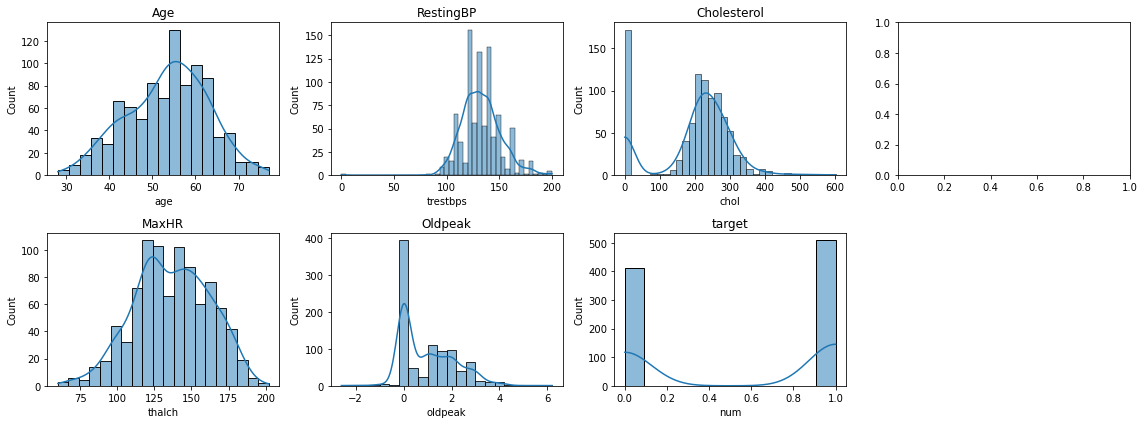

In [35]:
#use histogram plot to know the distribution
#setup the seaborn figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 6))

sns.histplot(data=data, x='age', ax=axes[0, 0],kde=True)
axes[0, 0].set_title("Age")
sns.histplot(data=data, x='trestbps', ax=axes[0, 1],kde=True)
axes[0, 1].set_title("RestingBP")
sns.histplot(data=data, x='chol', ax=axes[0, 2],kde=True)
axes[0, 2].set_title("Cholesterol")
sns.histplot(data=data, x='thalch', ax=axes[1, 0],kde=True)
axes[1, 0].set_title("MaxHR")
sns.histplot(data=data, x='oldpeak', ax=axes[1, 1],kde=True)
axes[1, 1].set_title("Oldpeak")
sns.histplot(data=data, x='num', ax=axes[1, 2],kde=True)
axes[1, 2].set_title("target")
fig.delaxes(axes[1, 3])
plt.tight_layout()
plt.show()

#### Findings
Age : The Age histogram shows a fairly normal distribution centered around the 50s to 60s, which is common in datasets related to heart disease.

RestingBP : The distribution is skewed to the right with a peak around 120-130. There is a small tail towards higher values.

Cholesterol : The distribution is roughly normal, but there is a spike at the lower end (around 0-100), possibly due to missing data coded as zero.

MaxHR : The distribution is normal, centered around 140-160, with a slight skew towards lower values.

Oldpeak : This is heavily right-skewed, with most values clustered around 0 and a long tail towards higher values.

HeartDisease : This is a binary distribution, likely representing the presence (1) or absence (0) of heart disease.

In [37]:
#Finding categorical columns and using ordinal encoding
categorical_columns = data.select_dtypes(include='object').columns
categorical_columns

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [39]:
#using ordinal encoding to change categorical columns to numerical

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data.dropna(inplace=True)
data[categorical_columns] = encoder.fit_transform(data[categorical_columns])
data.head()
data = pd.get_dummies(data, columns=categorical_columns)

#### Pairplot 
- Pairplot : It creates a grid of scatterplots and histograms where each variable in a dataset is plotted against every other variable.

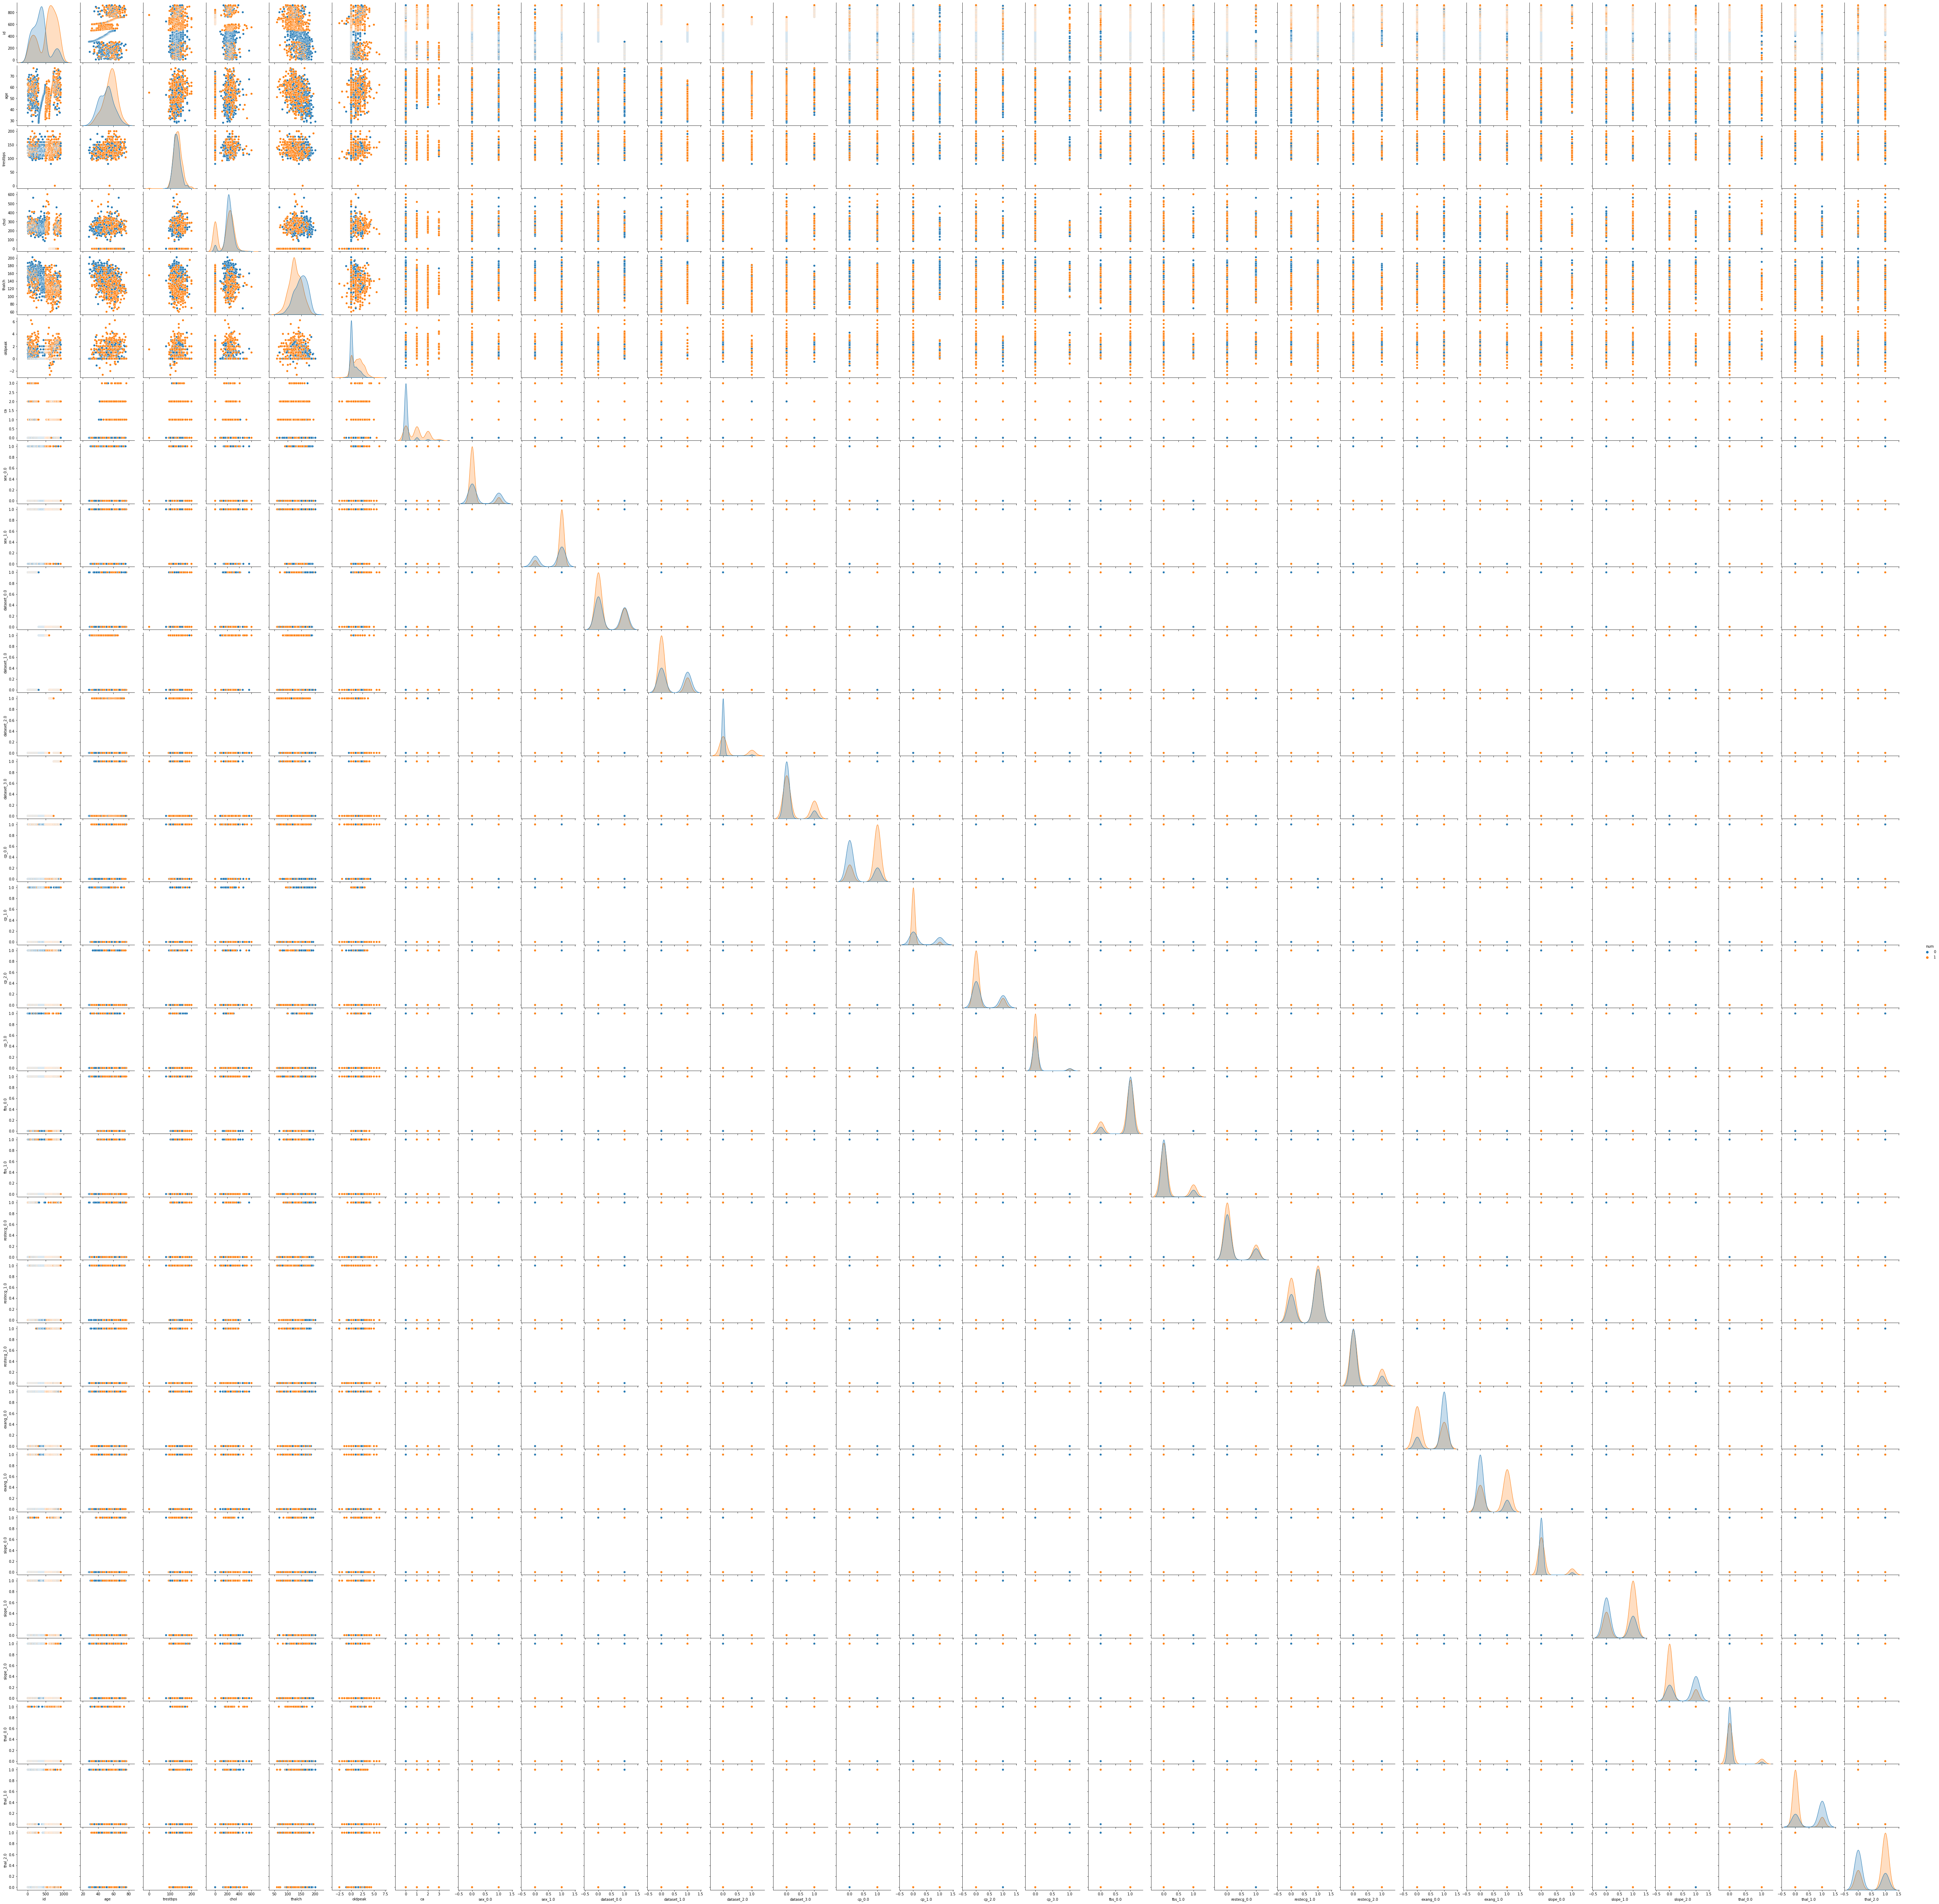

In [40]:
#Plotting a pairplot for data visualization

sns.pairplot(data, hue='num')

#### Findings 
Note: Based on the visualization of data points in a pairplot, we can make an informed decision about which machine learning algorithm might be suitable for model development. Here are the criteria for selecting an algorithm:

1. Logistic Regression:

Use if data points are clearly separated in the pairplot.
Logistic Regression works well when classes are linearly separable, meaning that you can draw a line (or hyperplane in higher dimensions) to separate different classes.

2. K-Nearest Neighbors (KNN):

Use if data points are somewhat overlapped but still show some structure.
KNN is effective for datasets where boundaries between classes are not clear-cut. It can capture non-linear relationships by considering the local neighborhood of each point.

3. Decision Tree or XGBoost:

Use if data points are heavily overlapped and complex.
Decision Trees and XGBoost (an advanced gradient boosting method) are powerful for handling complex, non-linear relationships and interactions in the data. They can model more intricate decision boundaries, making them suitable when data is highly overlapping and not easily separable.

In [41]:
# splitting the dataset into two groups as train and test datasets for consistent results across all models
from sklearn.model_selection import train_test_split

X = data.drop('num', axis=1)
y = data['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# concatenating xtrain and y tain to single dataset and creating a csv as train.csv
train = pd.concat([X_train, y_train], axis=1)
train.to_csv('..\data\heart_disease\data_train.csv', index=False)

# concatenating xtest and y test to single dataset and creating a csv as test.csv
test = pd.concat([X_test, y_test], axis=1)
test.to_csv('..\data\heart_disease\data_test.csv', index=False)

